In [1]:
] activate .

  Activating project at `~/research/7_2022_fall/point_cloud_registration`


In [2]:
] st

      Status `~/research/7_2022_fall/point_cloud_registration/Project.toml`
  [717857b8] DSP v0.7.8
  [5789e2e9] FileIO v1.16.0
  [4381153b] ImageDraw v0.2.5
  [916415d5] Images v0.23.3
  [9ecf9c4f] MeshViz v0.7.1
  [eacbb407] Meshes v0.26.6
  [91a5bcdd] Plots v1.38.0
  [90137ffa] StaticArrays v1.5.12
  [8bb1440f] DelimitedFiles
  [37e2e46d] LinearAlgebra
  [2f01184e] SparseArrays


In [3]:
] st

      Status `~/research/7_2022_fall/point_cloud_registration/Project.toml`
  [717857b8] DSP v0.7.8
  [5789e2e9] FileIO v1.16.0
  [4381153b] ImageDraw v0.2.5
  [916415d5] Images v0.23.3
  [9ecf9c4f] MeshViz v0.7.1
  [eacbb407] Meshes v0.26.6
  [91a5bcdd] Plots v1.38.0
  [90137ffa] StaticArrays v1.5.12
  [8bb1440f] DelimitedFiles
  [37e2e46d] LinearAlgebra
  [2f01184e] SparseArrays


In [4]:
using Images

In [5]:
using FileIO

In [6]:
using DelimitedFiles

In [7]:
function depth_to_dist(dimg)
    return reshape([Int(dimg[k].val.i)/1000.0 for k in eachindex(dimg)], size(dimg))
end
function dist_to_pc(dimg, KKinv)
    
    N = length(dimg)
    
    UVZ = ones(4, N)
    
    for (i, p) in enumerate(CartesianIndices(dimg))
        z = dimg[p]
        
        UVZ[1,i] = z * p[2]
        UVZ[2,i] = z * p[1]
        UVZ[3,i] = z
    end
    
    PC = KKinv * UVZ
        
    return PC
end

dist_to_pc (generic function with 1 method)

In [8]:
#data_folder = joinpath(pwd(), "data/sun3d-harvard_c11-hv_c11_2")
#data_folder = joinpath(pwd(), "data/analysis-by-synthesis-apt1-kitchen")
data_folder = joinpath(pwd(), "data/bundlefusion-copyroom")

"/Users/devanshagrawal/research/7_2022_fall/point_cloud_registration/data/bundlefusion-copyroom"

In [9]:
camera_intrinsics = readdlm(joinpath(data_folder,"camera-intrinsics.txt"))

3×3 Matrix{Float64}:
 583.0    0.0  320.0
   0.0  583.0  240.0
   0.0    0.0    1.0

In [10]:
KK = [[camera_intrinsics ;; zeros(3,1)] ; [zeros(1,3);; 1]]

4×4 Matrix{Float64}:
 583.0    0.0  320.0  0.0
   0.0  583.0  240.0  0.0
   0.0    0.0    1.0  0.0
   0.0    0.0    0.0  1.0

In [11]:
KKinv = inv(KK)

4×4 Matrix{Float64}:
 0.00171527  0.0         -0.548885  0.0
 0.0         0.00171527  -0.411664  0.0
 0.0         0.0          1.0       0.0
 0.0         0.0          0.0       1.0

In [12]:
img_nums = [lpad(i, 6, '0') for i in 0:1:5]
color_img_paths = [joinpath(data_folder, "seq-01/frame-$(n).color.png") for n in img_nums]
depth_img_paths = [joinpath(data_folder, "seq-01/frame-$(n).depth.png") for n in img_nums]
true_rota_paths = [joinpath(data_folder, "seq-01/frame-$(n).pose.txt") for n in img_nums]

6-element Vector{String}:
 "/Users/devanshagrawal/research/" ⋯ 61 bytes ⋯ "om/seq-01/frame-000000.pose.txt"
 "/Users/devanshagrawal/research/" ⋯ 61 bytes ⋯ "om/seq-01/frame-000001.pose.txt"
 "/Users/devanshagrawal/research/" ⋯ 61 bytes ⋯ "om/seq-01/frame-000002.pose.txt"
 "/Users/devanshagrawal/research/" ⋯ 61 bytes ⋯ "om/seq-01/frame-000003.pose.txt"
 "/Users/devanshagrawal/research/" ⋯ 61 bytes ⋯ "om/seq-01/frame-000004.pose.txt"
 "/Users/devanshagrawal/research/" ⋯ 61 bytes ⋯ "om/seq-01/frame-000005.pose.txt"

,,,,,

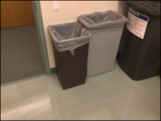
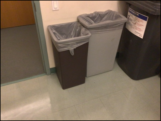
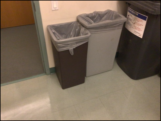
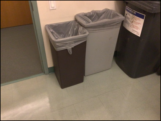
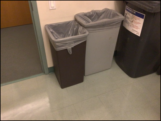
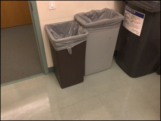

In [13]:
color_imgs = [load(p) for p in color_img_paths]

In [14]:
#depth_imgs = [load(p) for p in depth_img_paths]

In [15]:
# true_rots = [readdlm(p) for p in true_rota_paths]

In [16]:
# dist_imgs = [depth_to_dist(d) for d in depth_imgs]

In [17]:
color_imgs[1]  == color_imgs[2]

false

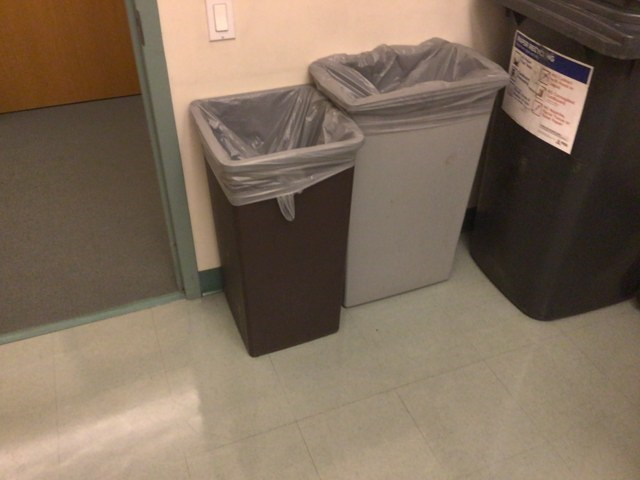

In [18]:
color_imgs[1]

In [19]:
using SparseArrays, StaticArrays

In [93]:
corners = imcorner(color_imgs[1], Percentile(99.5), method=shi_tomasi);

In [94]:
r, c, = findnz(sparse(corners))

([93, 94, 95, 94, 95, 95, 47, 45, 46, 270  …  36, 37, 36, 37, 37, 38, 37, 38, 37, 38], [140, 140, 140, 141, 141, 142, 143, 144, 144, 198  …  628, 628, 629, 629, 632, 632, 633, 633, 634, 634], Bool[1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [95]:
points = map((ri, ci) -> CartesianIndex(ri, ci), r, c)

1536-element Vector{CartesianIndex{2}}:
 CartesianIndex(93, 140)
 CartesianIndex(94, 140)
 CartesianIndex(95, 140)
 CartesianIndex(94, 141)
 CartesianIndex(95, 141)
 CartesianIndex(95, 142)
 CartesianIndex(47, 143)
 CartesianIndex(45, 144)
 CartesianIndex(46, 144)
 CartesianIndex(270, 198)
 CartesianIndex(271, 198)
 CartesianIndex(272, 198)
 CartesianIndex(273, 198)
 ⋮
 CartesianIndex(69, 595)
 CartesianIndex(68, 596)
 CartesianIndex(36, 628)
 CartesianIndex(37, 628)
 CartesianIndex(36, 629)
 CartesianIndex(37, 629)
 CartesianIndex(37, 632)
 CartesianIndex(38, 632)
 CartesianIndex(37, 633)
 CartesianIndex(38, 633)
 CartesianIndex(37, 634)
 CartesianIndex(38, 634)

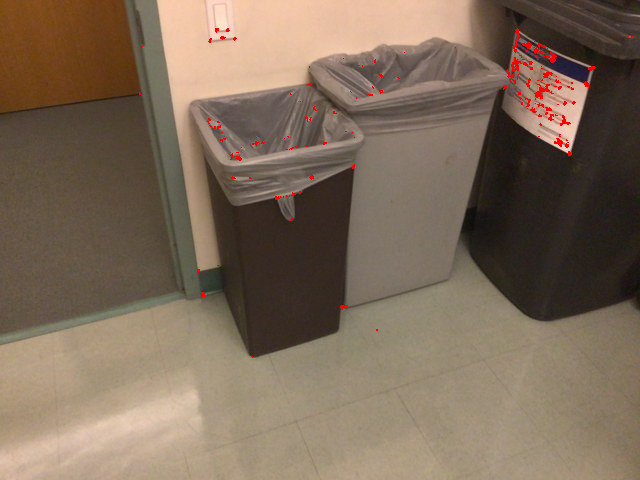

In [96]:
marked = copy(color_imgs[1])
marked[points] .= RGB(1,0,0)
marked

In [97]:
using Images, DSP, LinearAlgebra

# FFTW.set_num_threads(2)
"""
opticalFlow(im1::Array, im2::Array, kps::Array{CartesianIndex{2},1}; windowSize=15)
Parameters:
 - im1: An Image array, the first frame in time.
 - im2: The second frame in time, must be the same size as im1
 - kps: Key points, or points of interest within the image where the optical flow is expected.
 - windowSize: Window size for solving the flow equations. Default 15.
"""
function opticalFlowLK(im1::Array, im2::Array, kps::Array{CartesianIndex{2},1}; windowSize=15)
    h,w = size(im1)
    im1 = Array{Float64,2}(Gray.(im1))
    im2 = Array{Float64,2}(Gray.(im2))

    # Kernels
    kx = Array{Float64}(.25 .* [-1  1; -1 1]);
    ky = Array{Float64}(.25 .* [-1 -1;  1 1]);
    kt = Array{Float64}(.25 .* [ 1  1;  1 1]);

    # Derivatives on x, y and time
    imx = (DSP.conv(kx, im1) +
           DSP.conv(kx, im2))[2:end, 2:end];
    imy = (DSP.conv(ky, im1) +
           DSP.conv(kx, im1))[2:end, 2:end];
    imt = (DSP.conv(-kt, im2) +
           DSP.conv(-kt, im1))[2:end, 2:end];

    sz = size(im1);
    hitMap = zeros(sz);
    u = Float64[];
    v = Float64[];
    hsz = floor(windowSize/2);

    X2 = Array{Float64,2}(imx.^2);
    Y2 = Array{Float64,2}(imy.^2);
    XY = Array{Float64,2}(imx.*imy);
    XT = Array{Float64,2}(imx.*imt);
    YT = Array{Float64,2}(imy.*imt);

    for kp in kps
        i,j = kp[1],kp[2]
        left = j-hsz; right = j+hsz;
        top = i-hsz; bottom = i+hsz;

        if (left<=0);  left   = 1; end
        if (right>h);  right  = h; end
        if (top<=0);   top    = 1; end
        if (bottom>w); bottom = w; end

        ws = (right-left+1)*(bottom-top+1);

        A = [X2[i,j] XY[i,j];
             XY[i,j] Y2[i,j]]/ws;

        B = [XT[i,j];
             YT[i,j]]/ws;

        hitMap[i,j] = 1;
        U = pinv(A) * B;
        push!(u, U[1]);
        push!(v, U[2]);
    end
    return u, v, hitMap
end

opticalFlowLK

In [98]:
u, v, hitMap = opticalFlowLK(color_imgs[1], color_imgs[2], points; windowSize = 11)

([8.97006237006237, 7.783783783783781, 4.856608478802992, 6.7421181801019445, 4.530085959885385, 5.810971579643099, 12.719830200121269, 7.847626977518727, 8.162327718223583, 7.46807734403502  …  6.352251023192366, 14.659793814433009, -1.486708687311587, 13.9306296691569, -10.923344947735185, -0.887377412211325, -21.558415841584146, -4.118202247191011, -19.20427553444179, -4.707692307692305], [-2.671933471933471, -1.2972972972972974, 5.367830423940148, 1.5193505757976218, 4.091690544412609, 5.603436880370131, 16.28138265615525, 7.533721898417982, 13.81316998468605, 4.058737686975553  …  10.655388813096883, -6.5154639175257945, 12.743217319813649, -17.596584845250774, -8.738675958188157, -9.938627016766853, -13.615841584158416, -10.65887640449438, -17.923990498812334, -13.338461538461527], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0])

In [99]:
u

1536-element Vector{Float64}:
   8.97006237006237
   7.783783783783781
   4.856608478802992
   6.7421181801019445
   4.530085959885385
   5.810971579643099
  12.719830200121269
   7.847626977518727
   8.162327718223583
   7.46807734403502
  12.723725834797873
  -5.519999999999983
 -13.050991501416426
   ⋮
  -3.5500000000000025
 -91.00000000000036
   6.352251023192366
  14.659793814433009
  -1.486708687311587
  13.9306296691569
 -10.923344947735185
  -0.887377412211325
 -21.558415841584146
  -4.118202247191011
 -19.20427553444179
  -4.707692307692305

In [100]:
v

1536-element Vector{Float64}:
  -2.671933471933471
  -1.2972972972972974
   5.367830423940148
   1.5193505757976218
   4.091690544412609
   5.603436880370131
  16.28138265615525
   7.533721898417982
  13.81316998468605
   4.058737686975553
   1.4404217926186313
 -38.640000000000036
  -6.141643059490079
   ⋮
  -7.1000000000000005
   1.073446886934457e-13
  10.655388813096883
  -6.5154639175257945
  12.743217319813649
 -17.596584845250774
  -8.738675958188157
  -9.938627016766853
 -13.615841584158416
 -10.65887640449438
 -17.923990498812334
 -13.338461538461527

In [101]:
using ImageDraw

In [102]:
points[1].I

(93, 140)

In [103]:
u[1]

8.97006237006237

In [104]:
v[1]

-2.671933471933471

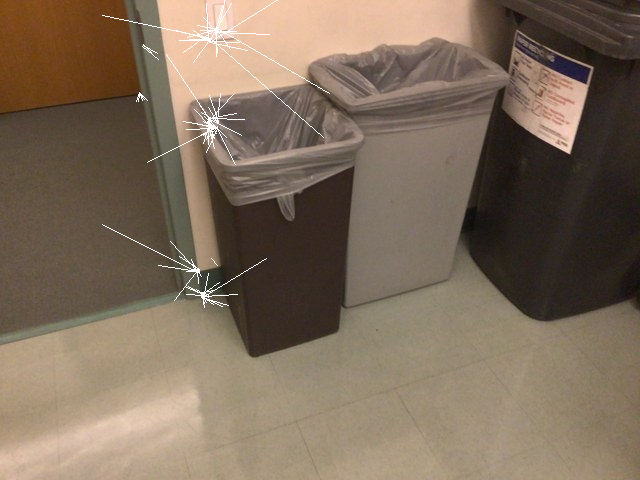

In [105]:

img = copy(color_imgs[1])
for i in 1:100 #eachindex(u)
    px, py = points[i].I
    
    p1 = Point(py, px)
    
    p2 = Point(round(py + v[i]), round(px + u[i]))
    
    draw!(img, LineSegment(p1, p2))
end

img

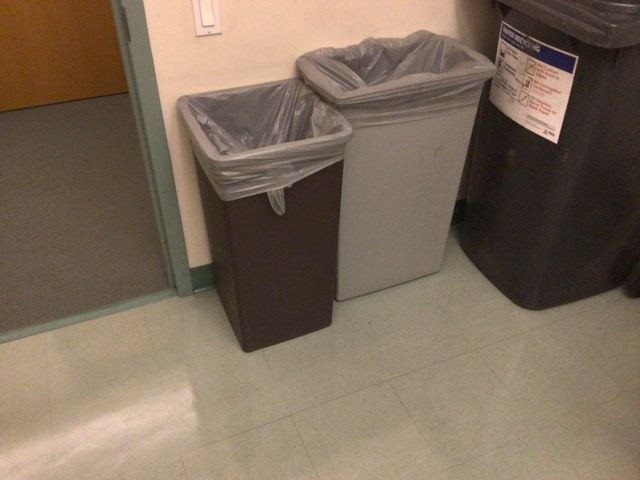

In [106]:
color_imgs[5]